In [1]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os,sys
parent_path = str(Path(os.getcwd()).parent)
sys.path.insert(1,parent_path)
from ChangeDetection.utilsCPD import *
from ChangeDetection.SWCPD import BaseDetector as SWDCP



In [2]:
df_TS = load_master_data("~/Downloads/has2023_master.csv.zip")


def prepare_data(df_TS,channels_start,id):
    initalized = False
    for k,name in zip(df_TS.iloc[id,channels_start:],df_TS.columns[channels_start:]):
        if np.array(k).shape[0]!=0:
            if not initalized:
                data = pd.DataFrame(k,columns=[name]).astype('float32')
                initalized = True
            else:
                data[name] = np.array(k).astype(np.float32)
    if df_TS.iloc[id].group == 'outdoor':
        data = data.iloc[:,:-3]
    GroundTruth = df_TS.iloc[id,5]

    data = (data - data.mean())/(data.std())
    return data,GroundTruth



In [242]:
IDs = [10,14,7,182,225,19,185,33,36,87,88,210,11,20,23,243,247,91,95,96,100,141,91,95,245]

METRICS_SWD = {}
for id in IDs:
    print(id)
    METRICS_SWD[id]  = {}
    df, GroundTruth = prepare_data(df_TS,8,id)
    if df.shape[0]<500:
        continue
    detector = SWDCP(data=df,window_length=500,max_history=20)
    detector.process_dataloader()
    METRICS_SWD[id]['F1'] =f_measure({'0':GroundTruth},detector.change_points['loc'],margin=100)
    METRICS_SWD[id]['Covering'] = covering({'0':GroundTruth},detector.change_points['loc'],n_obs=df.shape[0])
    print(METRICS_SWD[id])


10


  0%|          | 0/5098 [00:00<?, ?it/s]

 17%|█▋        | 845/5098 [00:02<00:12, 337.40it/s]

Change detected at: 1281 
Initiate new segment


 73%|███████▎  | 3738/5098 [00:11<00:04, 330.07it/s]

Change detected at: 4193 
Initiate new segment


100%|██████████| 5098/5098 [00:15<00:00, 336.75it/s]


{'F1': 0.8571428571428571, 'Covering': 0.736405939112972}
14


 44%|████▍     | 2389/5453 [00:07<00:09, 323.76it/s]

Change detected at: 2845 
Initiate new segment


 67%|██████▋   | 3649/5453 [00:11<00:05, 310.89it/s]

Change detected at: 4096 
Initiate new segment


100%|██████████| 5453/5453 [00:16<00:00, 324.81it/s]


{'F1': 0.8571428571428571, 'Covering': 0.7601708295222658}
7


 20%|█▉        | 1171/5876 [00:03<00:14, 333.39it/s]

Change detected at: 1611 
Initiate new segment


 41%|████      | 2389/5876 [00:07<00:10, 341.47it/s]

Change detected at: 2841 
Initiate new segment


 63%|██████▎   | 3685/5876 [00:10<00:06, 335.61it/s]

Change detected at: 4137 
Initiate new segment


 83%|████████▎ | 4848/5876 [00:14<00:03, 338.71it/s]

Change detected at: 5301 
Initiate new segment


100%|██████████| 5876/5876 [00:17<00:00, 337.40it/s]


{'F1': 1.0, 'Covering': 0.9959297005309319}
182


 43%|████▎     | 3507/8241 [00:10<00:13, 340.49it/s]

Change detected at: 3944 
Initiate new segment


 45%|████▌     | 3716/8241 [00:10<00:13, 341.32it/s]

Change detected at: 4176 
Initiate new segment


 88%|████████▊ | 7237/8241 [00:20<00:02, 353.83it/s]

Change detected at: 7693 
Initiate new segment


100%|██████████| 8241/8241 [00:23<00:00, 346.02it/s]


{'F1': 0.6666666666666665, 'Covering': 0.6986307937963215}
225


 36%|███▋      | 2456/6739 [00:06<00:11, 363.31it/s]

Change detected at: 2885 
Initiate new segment


 57%|█████▋    | 3813/6739 [00:10<00:08, 344.33it/s]

Change detected at: 4273 
Initiate new segment


 82%|████████▏ | 5549/6739 [00:15<00:03, 347.92it/s]

Change detected at: 5978 
Initiate new segment


100%|██████████| 6739/6739 [00:19<00:00, 354.16it/s]


{'F1': 0.888888888888889, 'Covering': 0.8021980341691818}
19


100%|██████████| 3797/3797 [00:11<00:00, 326.99it/s]


{'F1': 0.5, 'Covering': 0.3339207967916108}
185


 14%|█▍        | 1092/7761 [00:03<00:19, 342.39it/s]

Change detected at: 1526 
Initiate new segment


 50%|████▉     | 3857/7761 [00:11<00:11, 333.76it/s]

Change detected at: 4321 
Initiate new segment


 67%|██████▋   | 5225/7761 [00:15<00:07, 348.71it/s]

Change detected at: 5680 
Initiate new segment


 83%|████████▎ | 6477/7761 [00:18<00:03, 345.84it/s]

Change detected at: 6931 
Initiate new segment


100%|██████████| 7761/7761 [00:22<00:00, 345.99it/s]


{'F1': 0.9090909090909091, 'Covering': 0.8296982243173948}
33


 13%|█▎        | 976/7449 [00:03<00:20, 316.80it/s]

Change detected at: 1419 
Initiate new segment


 35%|███▍      | 2570/7449 [00:07<00:15, 323.89it/s]

Change detected at: 3007 
Initiate new segment


 53%|█████▎    | 3952/7449 [00:12<00:10, 321.47it/s]

Change detected at: 4390 
Initiate new segment


100%|██████████| 7449/7449 [00:22<00:00, 325.41it/s]


{'F1': 0.8, 'Covering': 0.7214890910498306}
36


 11%|█         | 1088/9963 [00:03<00:27, 326.96it/s]

Change detected at: 1548 
Initiate new segment


 42%|████▏     | 4153/9963 [00:12<00:17, 339.90it/s]

Change detected at: 4591 
Initiate new segment


100%|██████████| 9963/9963 [00:29<00:00, 340.77it/s]


{'F1': 0.6, 'Covering': 0.4326497948382314}
87


100%|██████████| 3062/3062 [00:09<00:00, 329.71it/s]


{'F1': 0.6666666666666666, 'Covering': 0.5314433619350193}
88


100%|██████████| 3947/3947 [00:12<00:00, 326.19it/s]


{'F1': 0.6666666666666666, 'Covering': 0.6193302991726175}
210


 36%|███▌      | 848/2361 [00:02<00:04, 360.12it/s]

Change detected at: 1291 
Initiate new segment


100%|██████████| 2361/2361 [00:06<00:00, 353.86it/s]


{'F1': 1.0, 'Covering': 0.9993009701375309}
11


 37%|███▋      | 1079/2924 [00:03<00:05, 344.97it/s]

Change detected at: 1526 
Initiate new segment


100%|██████████| 2924/2924 [00:08<00:00, 341.46it/s]


{'F1': 0.8, 'Covering': 0.8056260760098357}
20


 67%|██████▋   | 2689/4005 [00:08<00:04, 328.49it/s]

Change detected at: 3126 
Initiate new segment


100%|██████████| 4005/4005 [00:12<00:00, 323.80it/s]


Change detected at: 4500 
Initiate new segment
{'F1': 0.6666666666666666, 'Covering': 0.651887239777765}
23


 44%|████▎     | 995/2282 [00:02<00:03, 339.47it/s]

Change detected at: 1444 
Initiate new segment


100%|██████████| 2282/2282 [00:06<00:00, 334.03it/s]


{'F1': 0.8, 'Covering': 0.7940905596617417}
243


 32%|███▏      | 1162/3612 [00:03<00:07, 339.16it/s]

Change detected at: 1612 
Initiate new segment


 70%|███████   | 2539/3612 [00:07<00:03, 345.80it/s]

Change detected at: 2980 
Initiate new segment


100%|██████████| 3612/3612 [00:10<00:00, 342.87it/s]


{'F1': 1.0, 'Covering': 0.9990275069977558}
247


 81%|████████  | 1335/1658 [00:03<00:00, 340.65it/s]

Change detected at: 1770 
Initiate new segment


100%|██████████| 1658/1658 [00:04<00:00, 346.07it/s]


{'F1': 0.8, 'Covering': 0.6495311662854052}
91


100%|██████████| 2262/2262 [00:07<00:00, 319.29it/s]


{'F1': 1.0, 'Covering': 1.0}
95
96


100%|██████████| 638/638 [00:01<00:00, 326.11it/s]


{'F1': 1.0, 'Covering': 1.0}
100


100%|██████████| 455/455 [00:01<00:00, 330.87it/s]


{'F1': 1.0, 'Covering': 1.0}
141


 87%|████████▋ | 4944/5701 [00:14<00:02, 337.60it/s]

Change detected at: 5408 
Initiate new segment


100%|██████████| 5701/5701 [00:16<00:00, 339.81it/s]


{'F1': 0.6666666666666666, 'Covering': 0.8722580645161291}
91


100%|██████████| 2262/2262 [00:07<00:00, 318.01it/s]


{'F1': 1.0, 'Covering': 1.0}
95
245


100%|██████████| 804/804 [00:02<00:00, 348.89it/s]

{'F1': 1.0, 'Covering': 1.0}


In [244]:
f1,cov = [],[]
for k,metrics in METRICS_SWD.items():
    if len(metrics)>1:
        f1.append(metrics['F1'])
        cov.append(metrics['Covering'])

print(np.std(f1))
print(np.std(cov))

0.1525079341313407
0.19085715647884857


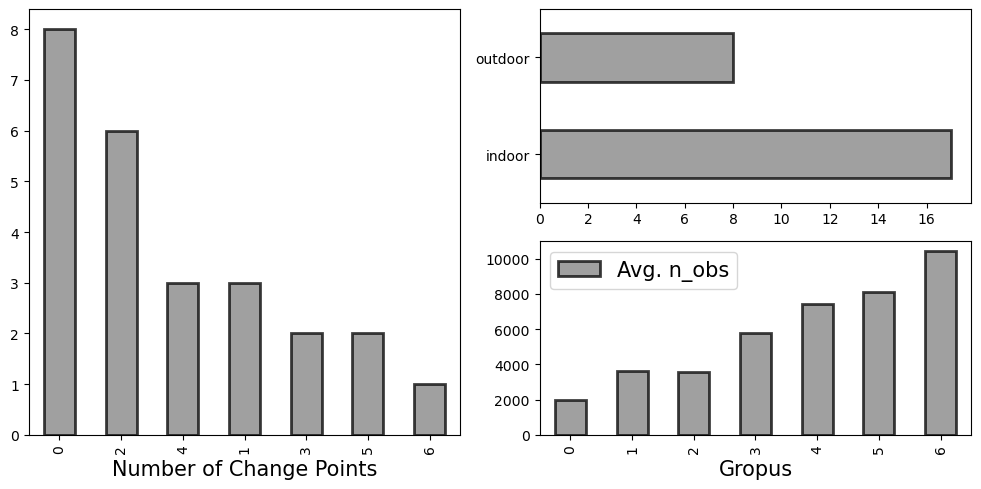

In [400]:
groups = []
ind_out = []
lengths = []
for id in IDs:
    groups.append(len(df_TS.iloc[id].change_points))
    ind_out.append(df_TS.iloc[id].group)
    lengths.append(df_TS.iloc[id]['x-acc'].shape[0])



fig = plt.figure(figsize=(10,5))

gs = GridSpec(2,2)

ax1 = fig.add_subplot(gs[:, 0])
#ax1.set_xticks([])  # Remove ticks on the x-axis if unnecessary
#ax1.set_yticks(ax1.get_yticks())
pd_plot1 = pd.Series(groups).value_counts()
#pd_plot1.name = 'Number of each segmentation'
pd_plot1.plot(kind='bar',edgecolor='black',color='grey',alpha=0.75,lw=2,ax=ax1)
#ax1.legend(fontsize=15)
ax1.set_xlabel('Number of Change Points',fontsize=15)
ax2 = fig.add_subplot(gs[:1, 1])
pd.Series(ind_out).value_counts().plot(kind='barh',edgecolor='black',color='grey',alpha=0.75,lw=2,ax=ax2)
#ax2.set_xticks([])  # Remove ticks on the x-axis if unnecessary
#ax2.set_yticks(ax1.get_yticks())
ax3 = fig.add_subplot(gs[1:,1])

df_plot3 = pd.DataFrame({'groups':groups,'n_obs':lengths}).groupby(['groups']).mean()
df_plot3.columns.values[0] = 'Avg. n_obs'
df_plot3.plot(kind='bar',ax=ax3,legend=False,edgecolor='black',color='grey',alpha=0.75,lw=2)
ax3.legend(fontsize=15)
ax3.set_xlabel('Gropus',fontsize=15)
#pd.Series(lengths).value_counts().plot(kind='bar',edgecolor='black',color='grey',alpha=0.75,lw=2,ax=ax[2])
#ax3.set_xticks([])  # Remove ticks on the x-axis if unnecessary
#ax3.set_yticks(ax1.get_yticks())
fig.tight_layout()

In [401]:
fig.savefig('HASC_appendix_analysis.pdf')

In [7]:
from claspy.segmentation import BinaryClaSPSegmentation
from claspy.data_loader import load_has_dataset
df_TS_CL = load_has_dataset()

In [240]:
METRICS = {}
IDs = [10,14,7,182,225,19,185,33,36,87,88,210,11,20,23,243,247,91,95,96,100,141,91,95,245]
#IDs = [243]
#IDs = [91, 95, 96, 100, 102, 118, 119, 127, 141, 143, 158, 165, 172, 173, 174, 186, 192, 193, 207, 213, 220, 221, 222, 223, 230, 234, 235, 236, 245, 246, 248]

for id in IDs:
    print(id)
    METRICS[id]  = {}

    dataset, window_size, true_cps,labels, time_series = df_TS_CL.iloc[id,:]

    clasp = BinaryClaSPSegmentation(window_size=window_size).fit(time_series)
    METRICS[id]['F1'] = f_measure({'0':true_cps},clasp.change_points,100)
    METRICS[id]['Covering'] = covering({'0':true_cps},clasp.change_points,time_series.shape[0])

    print(METRICS[id]['F1'])
    print(METRICS[id]['Covering'])

10
0.6666666666666666
0.47362938777338753
14
0.8
0.8147039545873119
7
1.0
0.9608166258723849
182
0.8333333333333333
0.8337458823596751
225
0.8000000000000002
0.8889321183710303
19
0.5
0.3339207967916108
185
0.3333333333333333
0.7536165086029252
33
0.923076923076923
0.9143636350134828
36
0.8333333333333333
0.6864314899996291
87
0.6666666666666666
0.6686324066273519
88
0.8
0.6270406599128661
210
1.0
0.9958139083139084
11
0.8
0.7932636738020196
20
0.7499999999999999
0.782645504781384
23
0.8571428571428571
0.7121560476078309
243
0.8
0.6898923340070571
247
0.8
0.6292284958231936
91
1.0
1.0
95
1.0
1.0
96


/home/sven/miniconda3/envs/torch/lib/python3.12/site-packages/claspy/segmentation.py:212: UserWarning: Time series must at least have 2*min_seg_size data points for segmentation. Try setting a smaller window size.
  warnings.warn(


1.0
1.0
100
1.0
1.0
141
0.6666666666666666
0.9230645161290323
91
1.0
1.0
95
1.0
1.0
245
0.6666666666666666
0.6446661550268611


In [246]:
f1,cov = [],[]
for k,metrics in METRICS.items():
    f1.append(metrics['F1'])
    cov.append(metrics['Covering'])

print(np.std(f1))
print(np.std(cov))

0.167022026210334
0.17667086724406597


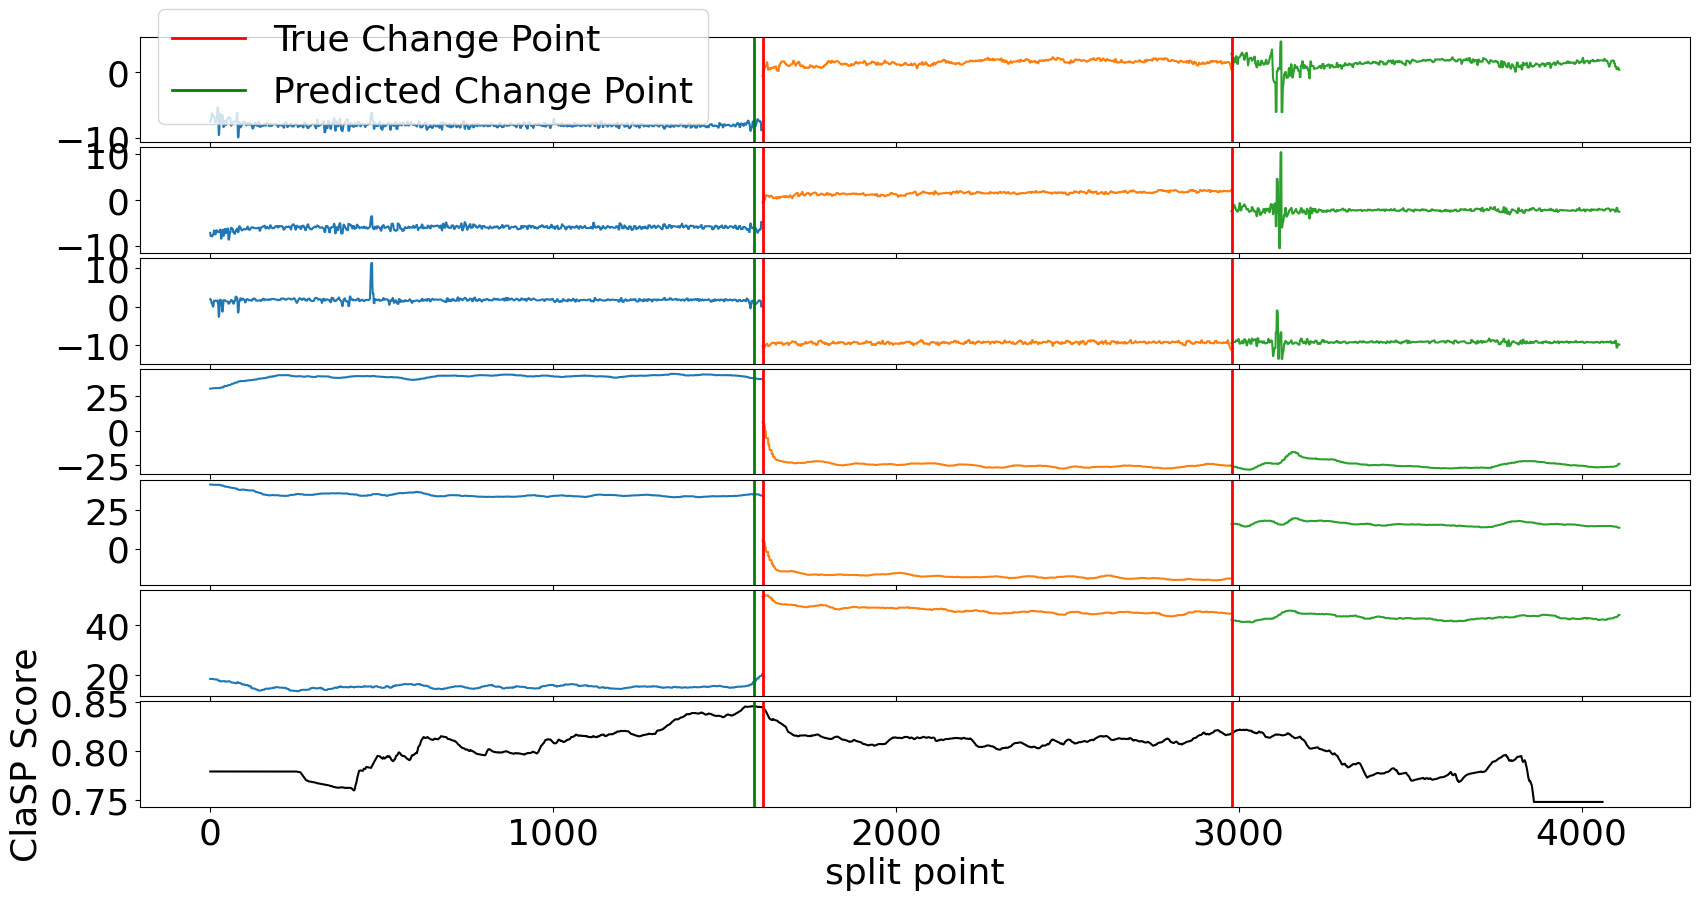

In [10]:
ax = clasp.plot(gt_cps=true_cps)

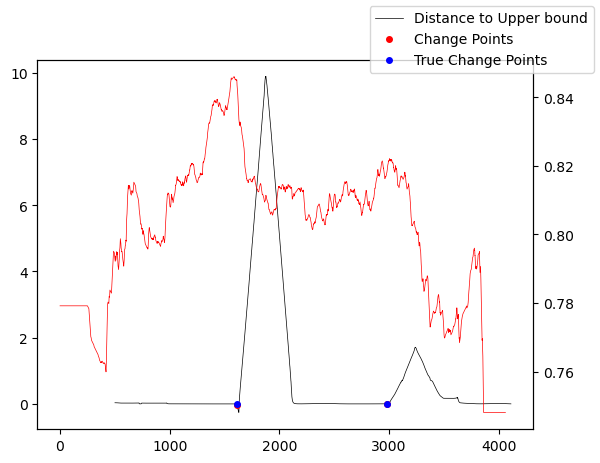

In [ ]:
fig,ax = detector.plot(GroundTruth)

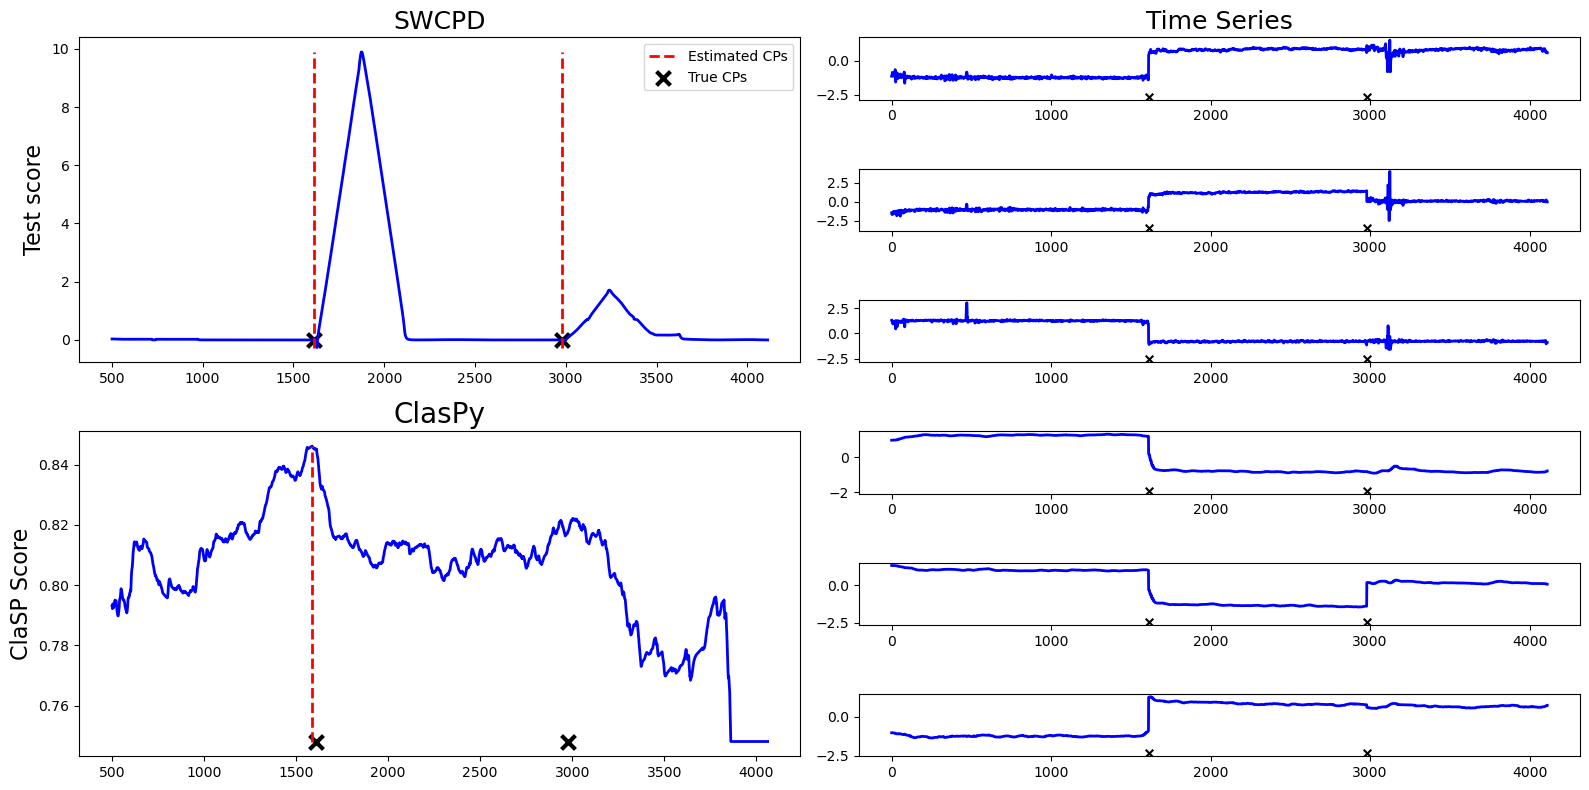

In [209]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from matplotlib.ticker import FuncFormatter


fig = plt.figure(figsize=(16, 8))
gs = GridSpec(df.shape[1],2)



ax1 = fig.add_subplot(gs[0:df.shape[1]//2, 0])  # Top half of the first column
ax1.set_title('SWCPD',fontsize=18)
test_stat = np.subtract(detector.upper[:-1],detector.cumsum[1:])
ax1.plot(t,test_stat,alpha=1,lw=2,color='blue')
ax1.vlines(np.array(detector.change_points['loc']),min(test_stat),max(test_stat),color='red',alpha=1.0,lw=2,ls='--',label='Estimated CPs')
ax1.scatter(GroundTruth,np.zeros(len(GroundTruth)),marker='x',color='black',s=100,linewidth=3,label='True CPs')
ax1.set_ylabel('Test score',fontsize=16)
ax1.legend(loc='upper right')

ax2 = fig.add_subplot(gs[df.shape[1]//2:, 0])  # Top half of the first colum
ax2.set_title('ClasPy',fontsize=20)
#ax2.plot(np.arange(clasp.profile.shape[0]),clasp.profile,color='blue',lw=0.75)
ax2.plot(t[:-window_size],clasp.profile[t[:-window_size]],color='blue',lw=2)
ax2.scatter(GroundTruth,np.min(clasp.profile)*np.ones(len(GroundTruth)),marker='x',color='black',s=100,linewidth=3)
ax2.vlines(clasp.change_points,np.min(clasp.profile),np.max(clasp.profile),color='red',lw=2,ls='--')
#ax2.plot(clasp.change_points,np.min(clasp.profile)*np.ones(len(clasp.change_points)),'o',color='red',ms=4)
#ax2.set_xlabel('Time')
ax2.set_ylabel('ClaSP Score',fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.2f}"))


#### fill out right hand side

for i in range(df.shape[1]):
    ax = fig.add_subplot(gs[i, 1])  
    ax.plot(df.iloc[:,i].values,lw=2,color='blue',alpha=1)
    ax.scatter(GroundTruth,(np.min(df.iloc[:,i]-1))*np.ones(len(GroundTruth)),marker='x',color='black',s=30,alpha=1)
    if i == 0: 
        ax.set_title('Time Series',fontsize=18)

fig.tight_layout()


In [210]:
fig.savefig('HASC_TS_243.pdf')

In [213]:
"HASC_TS_"+str(id)+".csv"

'HASC_TS_243.csv'

In [404]:
#IDs = [10,14,7,182,225,19,185,33,36,87,88,210,11,20,23,243,247]


for id in IDs:
    df_exp, cps = prepare_data(df_TS,8,id)
    df_exp.to_csv("HASC_TS_"+str(id)+".csv")